In [9]:
import sys, os
sys.path.append(os.path.abspath("./../feedback-grape"))
sys.path.append(os.path.abspath("./../"))

from feedback_grape.utils.states import basis
from feedback_grape.utils.tensor import tensor
from feedback_grape.utils.fidelity import fidelity

from library.utils.plot_matrix import plot_matrix

import numpy as np

psi_1 = tensor(*([basis(2, 1)]*2 + [basis(2, 0)])) + tensor(*([basis(2, 0)]*2 + [basis(2, 1)])) # |001> + |110>
psi_1 /= np.linalg.norm(psi_1)
rho_1 = psi_1 @ psi_1.conj().T

# Create a mixed non-diagonal density matrix
psi_2_a = tensor(*([basis(2, 0)]*2 + [basis(2, 1)])) # |110>
psi_2_a /= np.linalg.norm(psi_2_a)
psi_2_b = tensor(*([basis(2, 1)]*2 + [basis(2, 1)])) # |111>
psi_2_b /= np.linalg.norm(psi_2_b)
rho_2 = (psi_2_a @ psi_2_a.conj().T + psi_2_b @ psi_2_b.conj().T) # |110><110| + |111><111|
rho_2 += 0.1 * (psi_2_a @ psi_2_b.conj().T + psi_2_b @ psi_2_a.conj().T) # |110><111| + |111><110|
rho_2 += 0.2 * (psi_1 @ psi_2_a.conj().T + psi_2_a @ psi_1.conj().T) # |001><110| + |110><001|
rho_2 += 0.1 * rho_1  # Add a bit of rho_1 to make fidelity non-zero
rho_2 /= np.trace(rho_2)

lam_NN = (psi_1.conj().T @ rho_2 @ psi_1).sum()

# Check if rho_2 is a valid density matrix
def assert_valid_density_matrix(rho):
    assert np.isclose(np.trace(rho), 1), "Trace is not 1"
    assert np.allclose(rho, rho.conj().T), "Matrix is not Hermitian"
    assert np.linalg.eigvalsh(rho).min() >= -0.001, "Matrix is not positive semi-definite"

assert_valid_density_matrix(rho_1)
assert_valid_density_matrix(rho_2)

print("Purity 1", np.trace(rho_1 @ rho_1))
print("Purity 2", np.trace(rho_2 @ rho_2))
print("Fidelity", fidelity(C_target=rho_1, U_final=rho_2, evo_type="density"))
print("lambda_NN", lam_NN)
print("Commutator", np.linalg.norm(rho_1 @ rho_2 - rho_2 @ rho_1))

Purity 1 (0.9999999999999996+0j)
Purity 2 (0.5058620335560559+0j)
Fidelity 0.3704997849219231
lambda_NN (0.3704997849219233+0j)
Commutator 0.38298883964182473


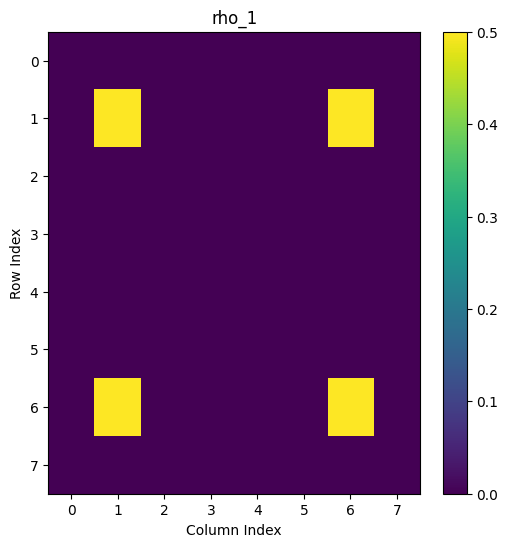

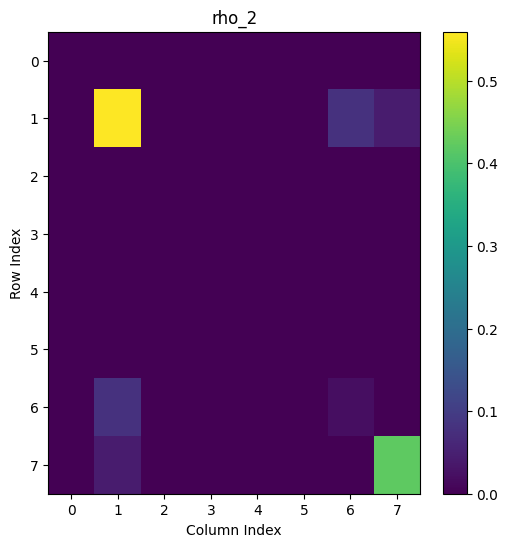

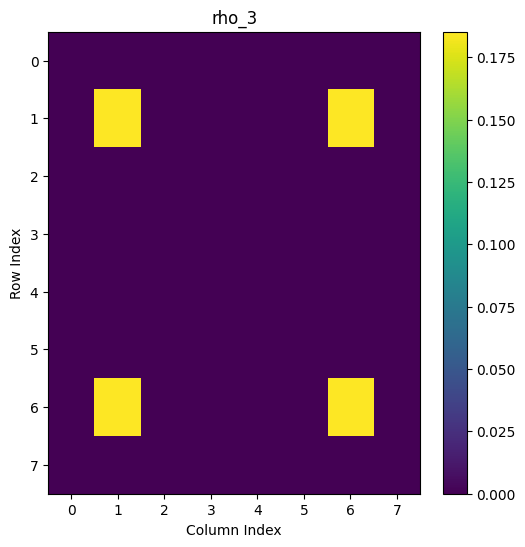

Norm 3 (0.37049978492192326+0j)
Fidelity 0.37049978492192326


In [10]:
# Now project onto pure matrix
rho_3 = rho_1 @ rho_2 @ rho_1.conj().T

plot_matrix(np.abs(rho_1), title="rho_1")
plot_matrix(np.abs(rho_2), title="rho_2")
plot_matrix(np.abs(rho_3), title="rho_3")

print("Norm 3", np.trace(rho_3))
print("Fidelity", fidelity(C_target=rho_1, U_final=rho_3, evo_type="density"))